In [89]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [90]:
ticker = 'AMZN'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']
data.head()

,AMZN
Date,
2010-01-04,133.899994
2010-01-05,134.690002
2010-01-06,132.250000
2010-01-07,130.000000
2010-01-08,133.520004


In [91]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,AMZN
Date,
2010-01-04,NaN
2010-01-05,0.005883
2010-01-06,-0.018282
2010-01-07,-0.017160
2010-01-08,0.026717


C:\Users\projeto11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'FREQUÊNCIA')

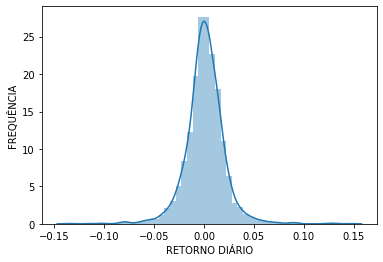

In [92]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("RETORNO DIÁRIO")
plt.ylabel("FREQUÊNCIA")

<AxesSubplot:xlabel='Date'>

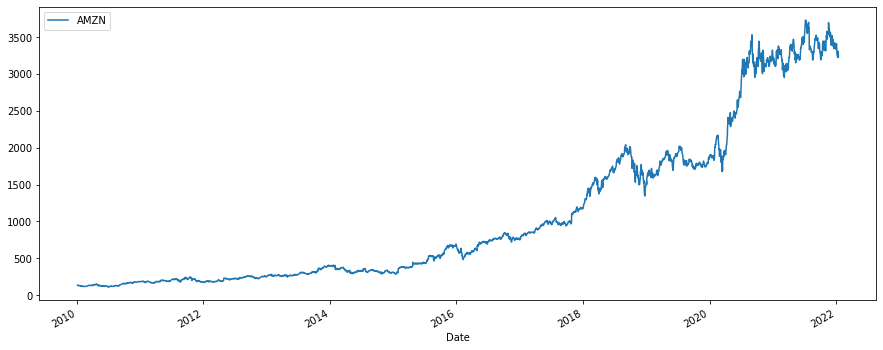

In [93]:
data.plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

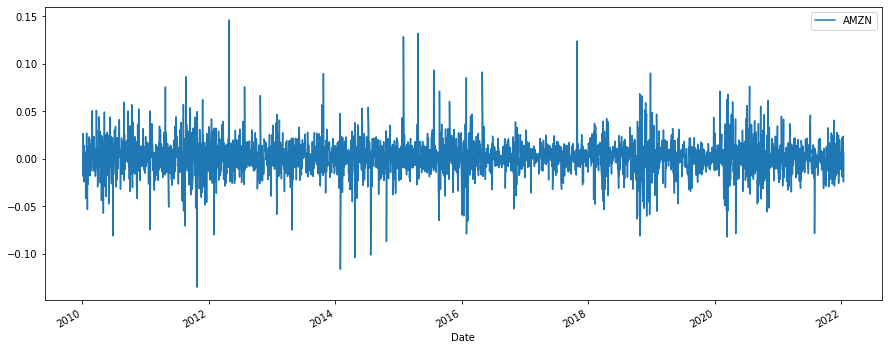

In [94]:
log_returns.plot(figsize=(15,6))

In [95]:
u = log_returns.mean()
var = log_returns.var()

In [96]:
drift = u - (0.5*var)
drift

AMZN    0.00086
dtype: float64

In [97]:
stddev = log_returns.std()

In [98]:
x = np.random.rand(10,2)
x

array([[0.28346449, 0.26293604],
       [0.49397061, 0.06131048],
       [0.85129092, 0.81799117],
       [0.94905588, 0.23789708],
       [0.07968353, 0.59169031],
       [0.51480046, 0.18362312],
       [0.8419801 , 0.72268463],
       [0.86673688, 0.02682036],
       [0.32763979, 0.86140597],
       [0.806395  , 0.43544439]])

In [99]:
norm.ppf(x)

array([[-0.57258017, -0.6343199 ],
       [-0.01511402, -1.5438653 ],
       [ 1.04198601,  0.90773609],
       [ 1.63576754, -0.71308337],
       [-1.4072035 ,  0.23189523],
       [ 0.03710777, -0.90164357],
       [ 1.0026292 ,  0.59083535],
       [ 1.11109783, -1.92972667],
       [-0.44643982,  1.08665781],
       [ 0.86468811, -0.16252964]])

In [100]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[ 0.44155791, -0.65820764,  0.47071378, ..., -0.33634821,
        -1.4312245 ,  0.3959087 ],
       [-0.58871322, -1.38448902, -0.26576341, ..., -0.56519543,
         0.22356525,  0.33338104],
       [-0.75084446, -1.50806024, -0.65194509, ..., -0.55272792,
        -0.53824876,  0.95980652],
       ...,
       [ 0.53969602, -0.83839825,  1.25802831, ...,  1.93557011,
        -1.08260841, -0.44502718],
       [-0.16955351,  1.5949201 ,  0.06909819, ...,  0.23897419,
         3.3617826 , -0.94216736],
       [-0.26806649,  0.64262086,  1.82784671, ..., -1.17985049,
         1.00811813,  0.59646893]])

In [101]:
t_intervals = 1000
iterations = 10
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))
daily_returns

array([[1.00792081, 1.0212636 , 1.02402728, ..., 1.01160071, 0.98427969,
        0.9781807 ],
       [0.9846563 , 0.99079451, 1.01824046, ..., 1.01555109, 1.00351072,
        1.01910161],
       [1.01447864, 1.01234189, 0.96636544, ..., 1.01004262, 0.99913732,
        1.00266005],
       ...,
       [0.98657197, 0.99014056, 1.02497195, ..., 1.02601741, 1.01642276,
        1.02397122],
       [0.99809692, 0.98814238, 0.99955699, ..., 1.00200573, 0.97980502,
        1.01049559],
       [1.00506134, 1.02702499, 1.02155048, ..., 0.99699564, 0.97961836,
        1.01951178]])

In [102]:
S0 = data.iloc[-1]
S0

AMZN    3242.76001
Name: 2022-01-14 00:00:00, dtype: float64

In [103]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[3242.76000977, 3242.76000977, 3242.76000977, ..., 3242.76000977,
        3242.76000977, 3242.76000977],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

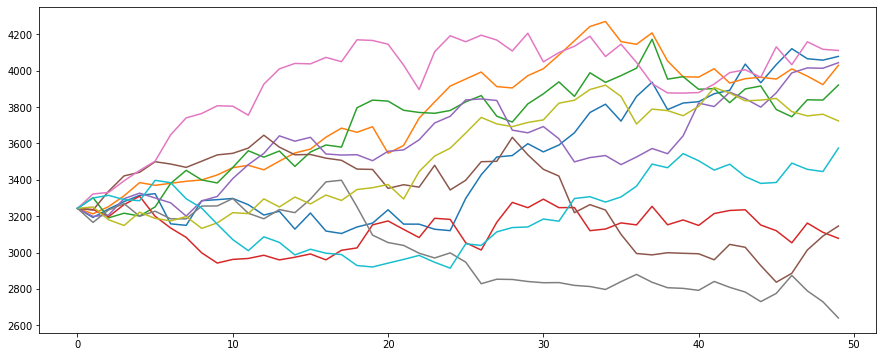

In [104]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

C:\Users\projeto11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'PREÇO DEPOIS DE 50 DIAS')

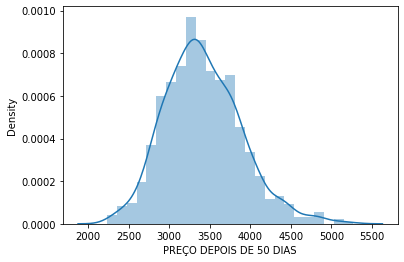

In [105]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("PREÇO DEPOIS DE 50 DIAS")

In [106]:
df = pd.DataFrame(price_list)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,...,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010,3242.760010
1,3193.004064,3212.908831,3301.909446,3236.558317,3198.604006,3233.582010,3322.150050,3165.512544,3250.766889,3300.173733,...,3307.428629,3326.673815,3296.918595,3191.374300,3248.405674,3199.393141,3284.029455,3293.188474,3254.144422,3304.701962
2,3239.234406,3252.562207,3190.851159,3197.141811,3206.817156,3336.878053,3330.519480,3234.216395,3180.182252,3314.765209,...,3304.485600,3305.094239,3150.288445,3205.143509,3341.875147,3188.978558,3225.378486,3326.260705,3251.337151,3313.492640
3,3280.220753,3311.901849,3216.233875,3263.821768,3296.157638,3421.676416,3394.709240,3268.819898,3148.666521,3291.020809,...,3186.922027,3285.747925,3152.478072,3176.061546,3331.098724,3137.014164,3289.538369,3349.061291,3165.414982,3326.690199
4,3314.474489,3384.762364,3200.796128,3309.615444,3326.776966,3441.544285,3451.538447,3199.706065,3221.890997,3285.040471,...,3133.712964,3354.176036,3219.259230,3177.803889,3330.599230,3077.351631,3272.382871,3350.659773,3217.130112,3332.002384


C:\Users\projeto11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\projeto11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\projeto11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

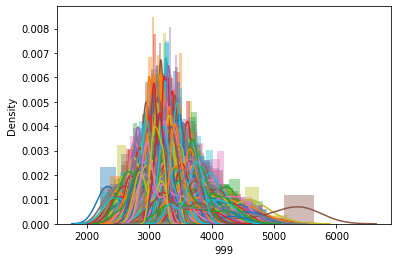

In [107]:
import seaborn as sns
for i in range(len(df.columns)):
    sns.distplot(df[i])